In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATStatic, nets
from NEATModels.Staticconfig  import static_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

Using TensorFlow backend.


In [6]:
npz_directory = '/home/sancere/Kepler/Incucyte/data/'
npz_name = 'Incucyte64.npz'
npz_val_name = 'Incucyte64Val.npz'


model_dir = '/home/sancere/Kepler/Incucyte/model/'
#Model name based on wether it is residual or sequntial ONEAT network
model_name = 'incucyteseqnetd92.h5'


In [7]:
static_categories_json = model_dir + 'StaticCategories.json'
key_categories = load_json(static_categories_json)
static_cord_json = model_dir + 'StaticCord.json'
key_cord = load_json(static_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = False
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 48
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7
mid_kernel = 7
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 92
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-6
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 100
# use softmax for single event per box, sigmoid for multi event per box
multievent = False
# Trainng image size
yolo_v0 = True
show = True
#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
stride = 4
show = True
imagex = 64
imagey = 64

In [8]:
config = static_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord, stride = stride,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel,
                         startfiler = startfilter, nboxes = nboxes, gridx = 1, gridy = 1, show = show,
                         epochs = epochs, learning_rate = learning_rate, imagex = imagex, imagey = imagey,
                         batch_size = batch_size, model_name = model_name, yolo_v0 = yolo_v0, multievent = multievent)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

static_config(batch_size=100, box_vector=2, categories=2, depth=47, epochs=250, gridx=1, gridy=1, imagex=64, imagey=64, key_categories={'Normal': 0, 'Cells': 1}, key_cord={'x': 0, 'y': 1}, learning_rate=1e-06, mid_kernel=7, model_name='incucyteseqnetd47.h5', multievent=False, nboxes=1, npz_directory='/home/sancere/Kepler/Incucyte/data/', npz_name='Incucyte64.npz', npz_val_name='Incucyte64Val.npz', residual=False, show=True, start_kernel=7, startfilter=32, stride=(4,), yolo_v0=True)


number of  images:	 1121
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
number of  images:	 59
image size (2D):		 (64, 64)
axes:				 SXYC
channels in / out:		 1
(1121, 1, 1, 4) 1


/home/sancere/anaconda3/envs/tensorflowGPU/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, None, None, 3 1600        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, None, None, 3 128         conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_32 (Activation)      (None, None, None, 3 0           batch_normalization_32[0][0]     
____________________________________________________________________________________________

Train on 1121 samples, validate on 59 samples
Epoch 1/250
1121/1121 [==============================] - 7s 6ms/step - loss: 1.4994 - acc: 0.4282 - val_loss: 1.5254 - val_acc: 0.4576

Epoch 00001: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.5254061222076416, 'val_acc': 0.4576271176338196, 'loss': 1.4993893584430908, 'acc': 0.4281891203426443, 'lr': 1e-06}


<Figure size 432x288 with 0 Axes>

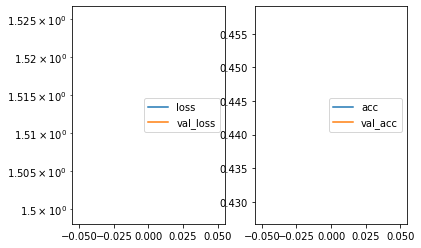

Predicted cell: Cells Probability: [[0.8189334]]
True Cell type: Cells
x [[0.58207387]]
True positional value x 0.34375
y [[0.6093833]]
True positional value y 0.65625


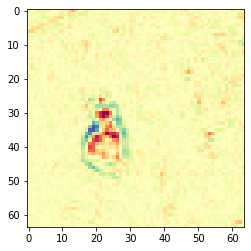

Epoch 2/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.4348 - acc: 0.4353 - val_loss: 1.4769 - val_acc: 0.4407

Epoch 00002: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.4768582582473755, 'val_acc': 0.4406779706478119, 'loss': 1.4347716488017237, 'acc': 0.4353255988177607, 'lr': 1e-06}


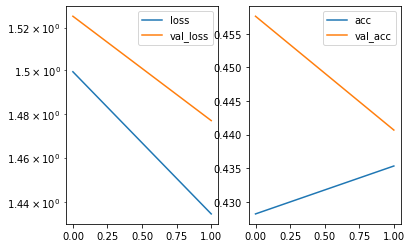

Predicted cell: Cells Probability: [[0.75330913]]
True Cell type: Normal
x [[0.28635475]]
True positional value x 0.5
y [[0.21705122]]
True positional value y 0.5


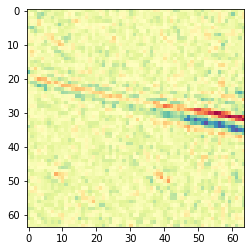

Epoch 3/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.3837 - acc: 0.4282 - val_loss: 1.4310 - val_acc: 0.4576

Epoch 00003: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.4309649467468262, 'val_acc': 0.4576271176338196, 'loss': 1.383664182527697, 'acc': 0.4281891160889676, 'lr': 1e-06}


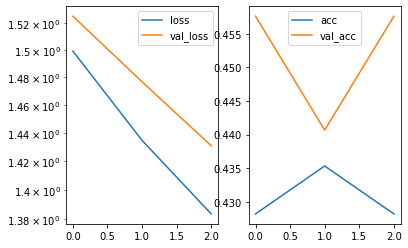

Predicted cell: Normal Probability: [[0.52619815]]
True Cell type: Cells
x [[0.5583877]]
True positional value x 0.5
y [[0.7223519]]
True positional value y 0.5


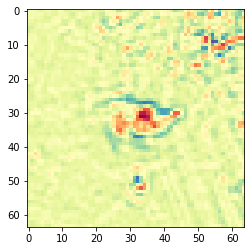

Epoch 4/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.2973 - acc: 0.4862 - val_loss: 1.3734 - val_acc: 0.5254

Epoch 00004: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.373390793800354, 'val_acc': 0.5254237055778503, 'loss': 1.2973145551707042, 'acc': 0.4861730553017037, 'lr': 1e-06}


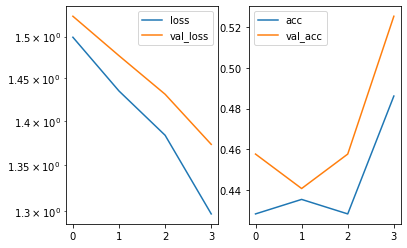

Predicted cell: Cells Probability: [[0.80221254]]
True Cell type: Cells
x [[0.36070862]]
True positional value x 0.34375
y [[0.31104404]]
True positional value y 0.65625


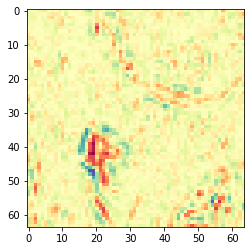

Epoch 5/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.1900 - acc: 0.6209 - val_loss: 1.3234 - val_acc: 0.6271

Epoch 00005: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.3234201669692993, 'val_acc': 0.6271186470985413, 'loss': 1.1899903973333543, 'acc': 0.6208742183835032, 'lr': 1e-06}


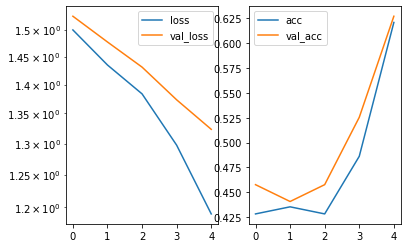

Predicted cell: Cells Probability: [[0.67837286]]
True Cell type: Cells
x [[0.40399146]]
True positional value x 0.65625
y [[0.63160276]]
True positional value y 0.34375


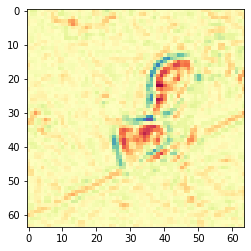

Epoch 6/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.1165 - acc: 0.7484 - val_loss: 1.2910 - val_acc: 0.7627

Epoch 00006: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2910451889038086, 'val_acc': 0.7627118825912476, 'loss': 1.1164892985286934, 'acc': 0.7484389003316384, 'lr': 1e-06}


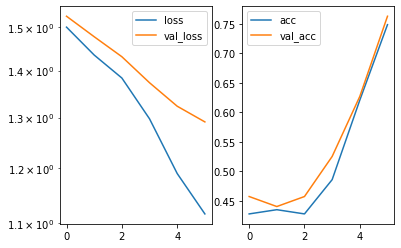

Predicted cell: Cells Probability: [[0.7971273]]
True Cell type: Cells
x [[0.50035745]]
True positional value x 0.5
y [[0.31220806]]
True positional value y 0.65625


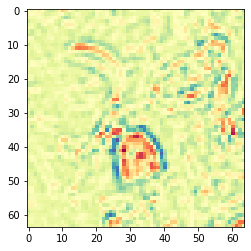

Epoch 7/250
1121/1121 [==============================] - 3s 3ms/step - loss: 1.0450 - acc: 0.8020 - val_loss: 1.2559 - val_acc: 0.8136

Epoch 00007: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2559179067611694, 'val_acc': 0.8135592937469482, 'loss': 1.0450464746550086, 'acc': 0.8019625261146824, 'lr': 1e-06}


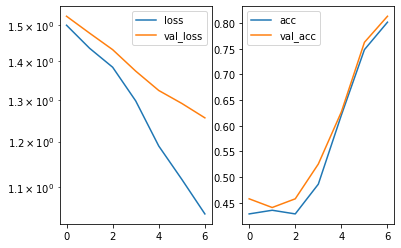

Predicted cell: Cells Probability: [[0.7834104]]
True Cell type: Cells
x [[0.44962925]]
True positional value x 0.65625
y [[0.78024143]]
True positional value y 0.5


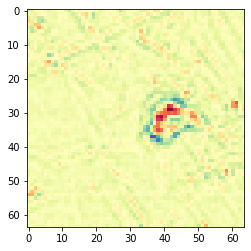

Epoch 8/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.9874 - acc: 0.8287 - val_loss: 1.2321 - val_acc: 0.8136

Epoch 00008: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2320637702941895, 'val_acc': 0.8135592937469482, 'loss': 0.9873935757312894, 'acc': 0.8287243568184757, 'lr': 1e-06}


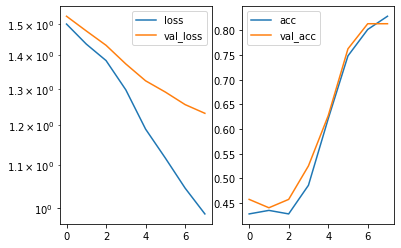

Predicted cell: Cells Probability: [[0.92398506]]
True Cell type: Cells
x [[0.5529148]]
True positional value x 0.34375
y [[0.69955075]]
True positional value y 0.65625


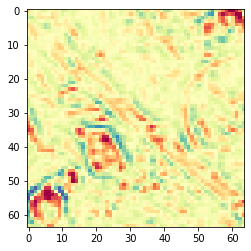

Epoch 9/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.9396 - acc: 0.8412 - val_loss: 1.2224 - val_acc: 0.8136

Epoch 00009: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2224153280258179, 'val_acc': 0.8135592937469482, 'loss': 0.9395607888539065, 'acc': 0.8412132010621539, 'lr': 1e-06}


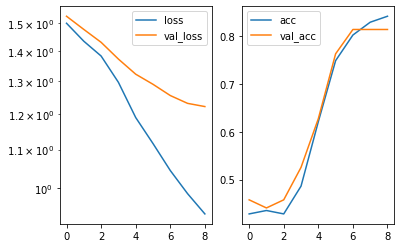

Predicted cell: Cells Probability: [[0.91657597]]
True Cell type: Cells
x [[0.6126225]]
True positional value x 0.5
y [[0.5087401]]
True positional value y 0.5


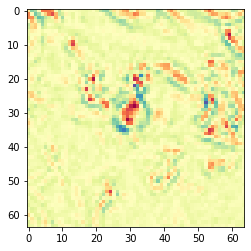

Epoch 10/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.9024 - acc: 0.8501 - val_loss: 1.2190 - val_acc: 0.8305

Epoch 00010: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2189862728118896, 'val_acc': 0.8305084705352783, 'loss': 0.9023673730594148, 'acc': 0.8501338129804987, 'lr': 1e-06}


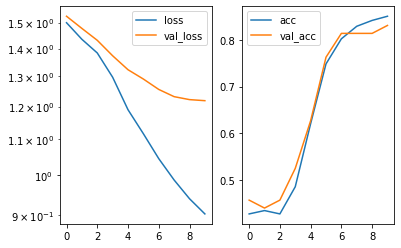

Predicted cell: Cells Probability: [[0.8402184]]
True Cell type: Cells
x [[0.65675]]
True positional value x 0.5
y [[0.34631562]]
True positional value y 0.34375


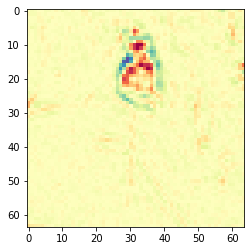

Epoch 11/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.8906 - acc: 0.8501 - val_loss: 1.2146 - val_acc: 0.8305

Epoch 00011: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2145698070526123, 'val_acc': 0.8305084705352783, 'loss': 0.8906431840957009, 'acc': 0.8501338121829344, 'lr': 1e-06}


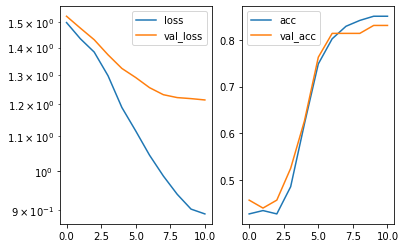

Predicted cell: Cells Probability: [[0.8138342]]
True Cell type: Cells
x [[0.35777375]]
True positional value x 0.5
y [[0.68659234]]
True positional value y 0.65625


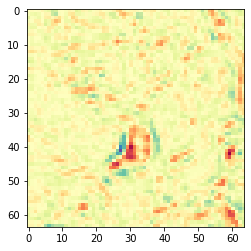

Epoch 12/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.8518 - acc: 0.8599 - val_loss: 1.2130 - val_acc: 0.8305

Epoch 00012: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2130308151245117, 'val_acc': 0.8305084705352783, 'loss': 0.8517968670583856, 'acc': 0.8599464836448139, 'lr': 1e-06}


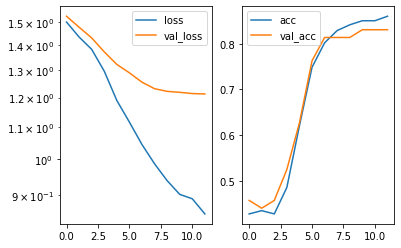

Predicted cell: Cells Probability: [[0.863682]]
True Cell type: Cells
x [[0.6435422]]
True positional value x 0.5
y [[0.3395943]]
True positional value y 0.34375


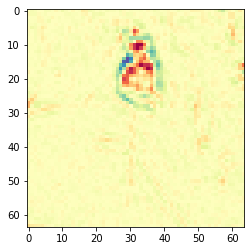

Epoch 13/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.8482 - acc: 0.8591 - val_loss: 1.2089 - val_acc: 0.8305

Epoch 00013: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2089169025421143, 'val_acc': 0.8305084705352783, 'loss': 0.8482176649793783, 'acc': 0.8590544209110216, 'lr': 1e-06}


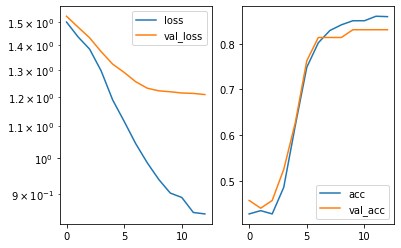

Predicted cell: Cells Probability: [[0.91099286]]
True Cell type: Cells
x [[0.30806425]]
True positional value x 0.65625
y [[0.33298442]]
True positional value y 0.5


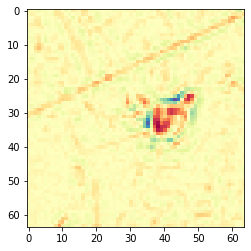

Epoch 14/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.8157 - acc: 0.8635 - val_loss: 1.2045 - val_acc: 0.8305

Epoch 00014: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2044795751571655, 'val_acc': 0.8305084705352783, 'loss': 0.8156525695781215, 'acc': 0.8635147199579694, 'lr': 1e-06}


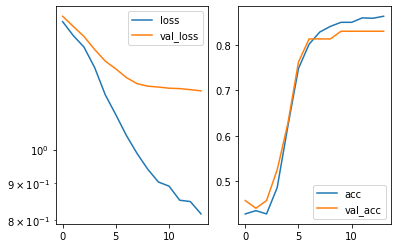

Predicted cell: Cells Probability: [[0.8763825]]
True Cell type: Cells
x [[0.48478046]]
True positional value x 0.34375
y [[0.34610566]]
True positional value y 0.65625


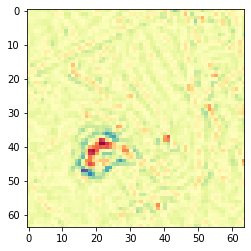

Epoch 15/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.8008 - acc: 0.8626 - val_loss: 1.2019 - val_acc: 0.8305

Epoch 00015: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.201886773109436, 'val_acc': 0.8305084705352783, 'loss': 0.8007900068847119, 'acc': 0.8626226601485798, 'lr': 1e-06}


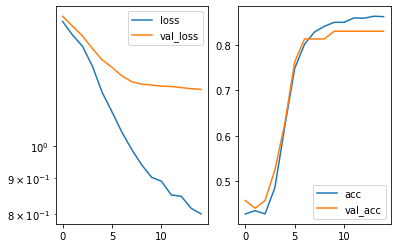

Predicted cell: Cells Probability: [[0.9084666]]
True Cell type: Cells
x [[0.30475175]]
True positional value x 0.5
y [[0.52781355]]
True positional value y 0.34375


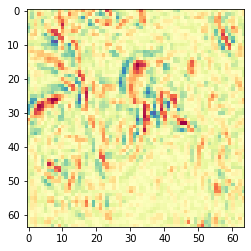

Epoch 16/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7783 - acc: 0.8644 - val_loss: 1.2000 - val_acc: 0.8305

Epoch 00016: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.200032114982605, 'val_acc': 0.8305084705352783, 'loss': 0.778318886348544, 'acc': 0.8644067773746658, 'lr': 1e-06}


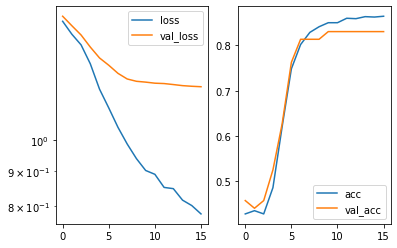

Predicted cell: Cells Probability: [[0.95627177]]
True Cell type: Cells
x [[0.37994027]]
True positional value x 0.34375
y [[0.6956842]]
True positional value y 0.65625


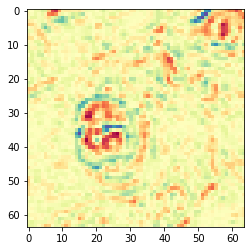

Epoch 17/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7601 - acc: 0.8653 - val_loss: 1.2017 - val_acc: 0.8305

Epoch 00017: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2017325162887573, 'val_acc': 0.8305084705352783, 'loss': 0.7600887456608074, 'acc': 0.8652988440962799, 'lr': 1e-06}


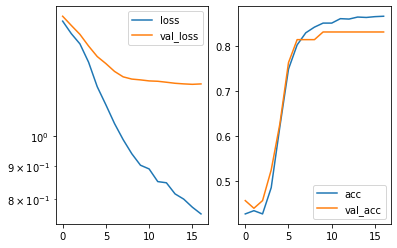

Predicted cell: Cells Probability: [[0.97594064]]
True Cell type: Cells
x [[0.7430452]]
True positional value x 0.65625
y [[0.4720008]]
True positional value y 0.5


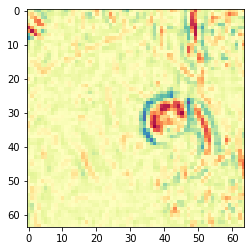

Epoch 18/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7512 - acc: 0.8644 - val_loss: 1.2042 - val_acc: 0.8305

Epoch 00018: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2041702270507812, 'val_acc': 0.8305084705352783, 'loss': 0.7511886216826358, 'acc': 0.8644067850844548, 'lr': 1e-06}


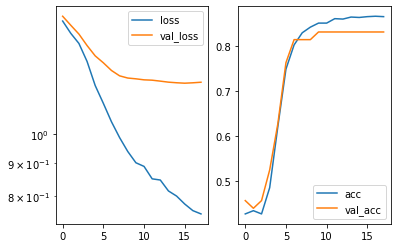

Predicted cell: Cells Probability: [[0.98968595]]
True Cell type: Cells
x [[0.575066]]
True positional value x 0.5
y [[0.70778126]]
True positional value y 0.5


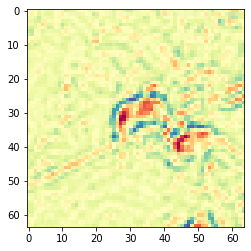

Epoch 19/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7592 - acc: 0.8653 - val_loss: 1.2022 - val_acc: 0.8305

Epoch 00019: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2022175788879395, 'val_acc': 0.8305084705352783, 'loss': 0.7591704953259171, 'acc': 0.8652988432987155, 'lr': 1e-06}


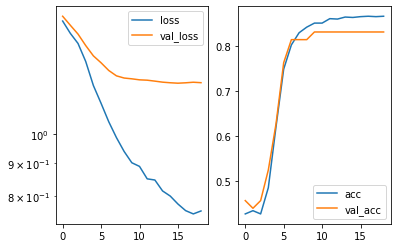

Predicted cell: Cells Probability: [[0.92485625]]
True Cell type: Cells
x [[0.42415765]]
True positional value x 0.34375
y [[0.7130118]]
True positional value y 0.65625


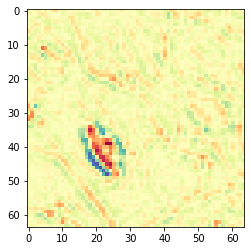

Epoch 20/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7297 - acc: 0.8644 - val_loss: 1.2020 - val_acc: 0.8305

Epoch 00020: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2020238637924194, 'val_acc': 0.8305084705352783, 'loss': 0.7296919253231903, 'acc': 0.8644067728551342, 'lr': 1e-06}


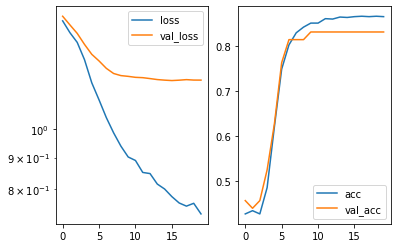

Predicted cell: Cells Probability: [[0.9387875]]
True Cell type: Normal
x [[0.28260508]]
True positional value x 0.5
y [[0.159636]]
True positional value y 0.5


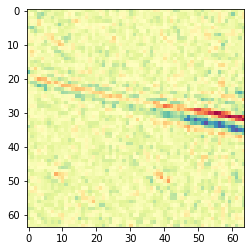

Epoch 21/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.7064 - acc: 0.8671 - val_loss: 1.2014 - val_acc: 0.8305

Epoch 00021: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2014269828796387, 'val_acc': 0.8305084705352783, 'loss': 0.7064341069543926, 'acc': 0.8670829607906563, 'lr': 1e-06}


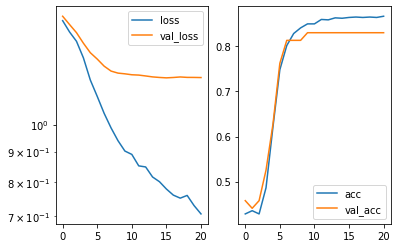

Predicted cell: Cells Probability: [[0.9336699]]
True Cell type: Cells
x [[0.33749408]]
True positional value x 0.5
y [[0.49690342]]
True positional value y 0.34375


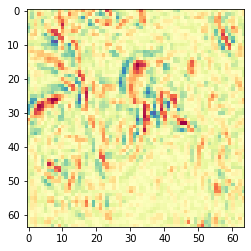

Epoch 22/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6982 - acc: 0.8653 - val_loss: 1.2004 - val_acc: 0.8305

Epoch 00022: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.2004082202911377, 'val_acc': 0.8305084705352783, 'loss': 0.698173418149259, 'acc': 0.865298838779184, 'lr': 1e-06}


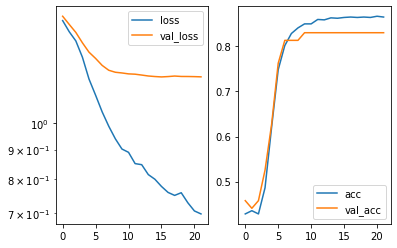

Predicted cell: Cells Probability: [[0.9751683]]
True Cell type: Cells
x [[0.49513566]]
True positional value x 0.34375
y [[0.9436742]]
True positional value y 0.5


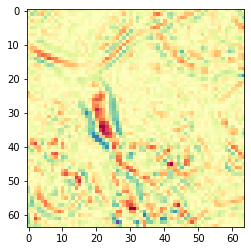

Epoch 23/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6767 - acc: 0.8715 - val_loss: 1.2003 - val_acc: 0.8305

Epoch 00023: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.200325608253479, 'val_acc': 0.8305084705352783, 'loss': 0.6767060156914935, 'acc': 0.8715432811059876, 'lr': 1e-06}


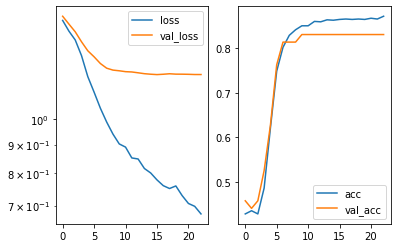

Predicted cell: Cells Probability: [[0.9705602]]
True Cell type: Normal
x [[0.825728]]
True positional value x 0.5
y [[0.7986387]]
True positional value y 0.5


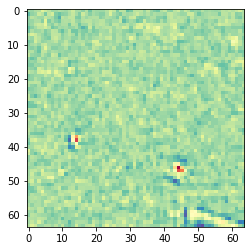

Epoch 24/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6820 - acc: 0.8715 - val_loss: 1.1994 - val_acc: 0.8305

Epoch 00024: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1994049549102783, 'val_acc': 0.8305084705352783, 'loss': 0.6819576814597893, 'acc': 0.8715432635595711, 'lr': 1e-06}


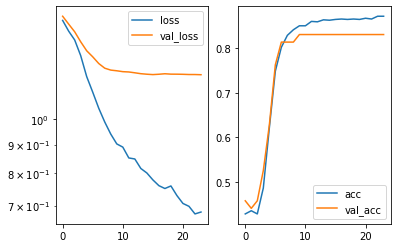

Predicted cell: Cells Probability: [[0.90968674]]
True Cell type: Cells
x [[0.6436432]]
True positional value x 0.5
y [[0.40553612]]
True positional value y 0.34375


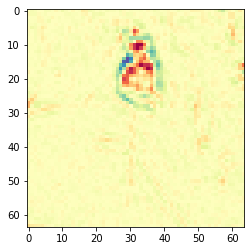

Epoch 25/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6687 - acc: 0.8724 - val_loss: 1.1967 - val_acc: 0.8136

Epoch 00025: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1967054605484009, 'val_acc': 0.8135592937469482, 'loss': 0.6686706537119944, 'acc': 0.8724353270909277, 'lr': 1e-06}


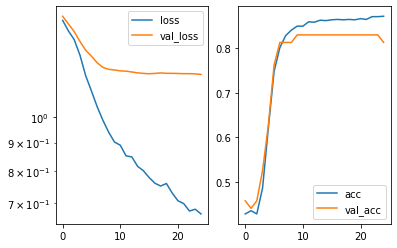

Predicted cell: Cells Probability: [[0.84766054]]
True Cell type: Cells
x [[0.33363736]]
True positional value x 0.5
y [[0.44705653]]
True positional value y 0.34375


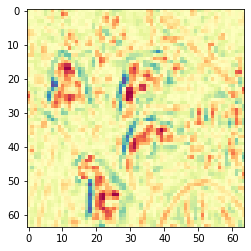

Epoch 26/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6516 - acc: 0.8822 - val_loss: 1.1924 - val_acc: 0.8136

Epoch 00026: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1923779249191284, 'val_acc': 0.8135592937469482, 'loss': 0.6515543574100089, 'acc': 0.8822479887161799, 'lr': 1e-06}


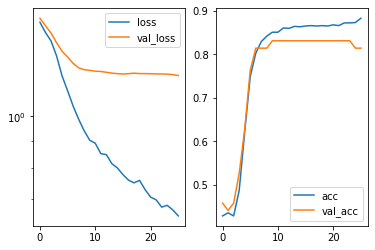

Predicted cell: Cells Probability: [[0.91119325]]
True Cell type: Cells
x [[0.45146936]]
True positional value x 0.34375
y [[0.6412753]]
True positional value y 0.65625


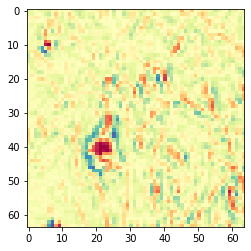

Epoch 27/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6534 - acc: 0.8867 - val_loss: 1.1870 - val_acc: 0.8136

Epoch 00027: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1870181560516357, 'val_acc': 0.8135592937469482, 'loss': 0.653370207968192, 'acc': 0.8867082864338537, 'lr': 1e-06}


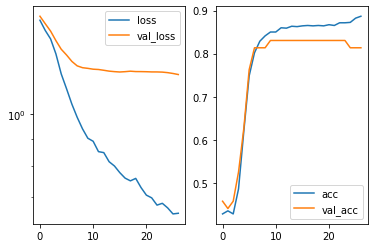

Predicted cell: Cells Probability: [[0.94519794]]
True Cell type: Cells
x [[0.5524716]]
True positional value x 0.5
y [[0.7168553]]
True positional value y 0.34375


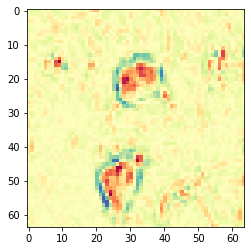

Epoch 28/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6486 - acc: 0.8912 - val_loss: 1.1813 - val_acc: 0.8136

Epoch 00028: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.181254506111145, 'val_acc': 0.8135592937469482, 'loss': 0.6485511233081358, 'acc': 0.8911686006345247, 'lr': 1e-06}


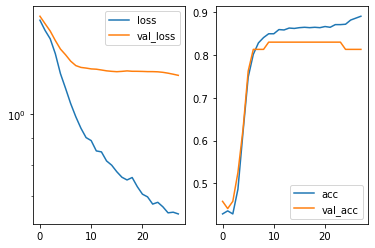

Predicted cell: Cells Probability: [[0.89759874]]
True Cell type: Cells
x [[0.3975979]]
True positional value x 0.5
y [[0.2557214]]
True positional value y 0.34375


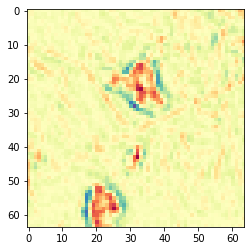

Epoch 29/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6259 - acc: 0.9072 - val_loss: 1.1758 - val_acc: 0.8136

Epoch 00029: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1758027076721191, 'val_acc': 0.8135592937469482, 'loss': 0.6259160413474084, 'acc': 0.9072257029914516, 'lr': 1e-06}


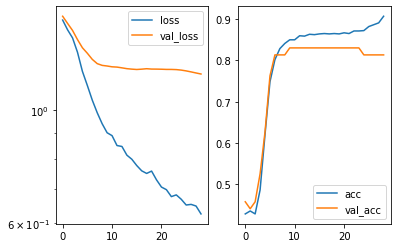

Predicted cell: Cells Probability: [[0.83924955]]
True Cell type: Cells
x [[0.5210205]]
True positional value x 0.65625
y [[0.85769105]]
True positional value y 0.5


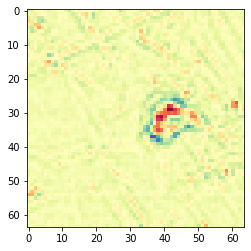

Epoch 30/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6199 - acc: 0.9144 - val_loss: 1.1712 - val_acc: 0.8136

Epoch 00030: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1711905002593994, 'val_acc': 0.8135592937469482, 'loss': 0.6199234934601796, 'acc': 0.9143621830616967, 'lr': 1e-06}


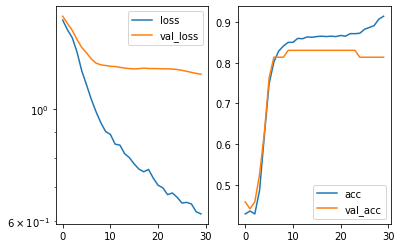

Predicted cell: Cells Probability: [[0.96736073]]
True Cell type: Cells
x [[0.7798419]]
True positional value x 0.65625
y [[0.36127278]]
True positional value y 0.65625


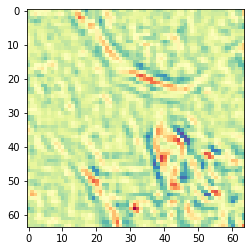

Epoch 31/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6134 - acc: 0.9260 - val_loss: 1.1658 - val_acc: 0.8136

Epoch 00031: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1657930612564087, 'val_acc': 0.8135592937469482, 'loss': 0.6134151086862549, 'acc': 0.9259589696228239, 'lr': 1e-06}


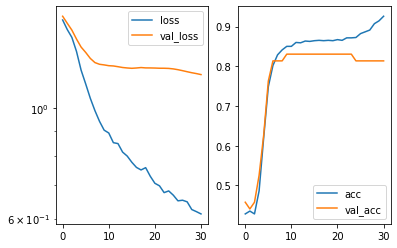

Predicted cell: Cells Probability: [[0.8821414]]
True Cell type: Cells
x [[0.86431116]]
True positional value x 0.65625
y [[0.56508493]]
True positional value y 0.5


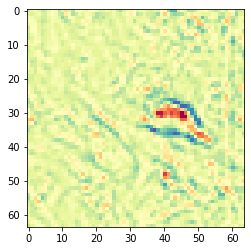

Epoch 32/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6226 - acc: 0.9224 - val_loss: 1.1581 - val_acc: 0.8136

Epoch 00032: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.158123254776001, 'val_acc': 0.8135592937469482, 'loss': 0.6225568672889689, 'acc': 0.9223907189535095, 'lr': 1e-06}


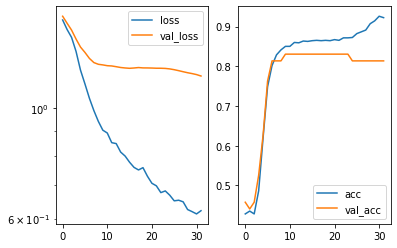

Predicted cell: Cells Probability: [[0.9041231]]
True Cell type: Cells
x [[0.60335493]]
True positional value x 0.65625
y [[0.6843256]]
True positional value y 0.5


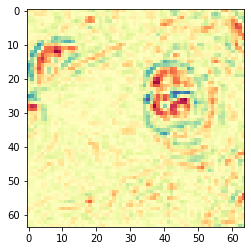

Epoch 33/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5945 - acc: 0.9456 - val_loss: 1.1518 - val_acc: 0.8136

Epoch 00033: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1517893075942993, 'val_acc': 0.8135592937469482, 'loss': 0.5945041802820619, 'acc': 0.9455843013806815, 'lr': 1e-06}


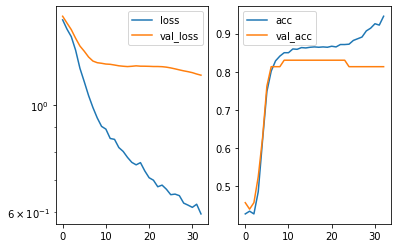

Predicted cell: Cells Probability: [[0.8312263]]
True Cell type: Cells
x [[0.6828154]]
True positional value x 0.65625
y [[0.5409028]]
True positional value y 0.5


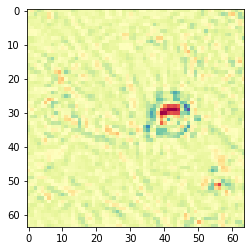

Epoch 34/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.6138 - acc: 0.9367 - val_loss: 1.1461 - val_acc: 0.8136

Epoch 00034: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1460890769958496, 'val_acc': 0.8135592937469482, 'loss': 0.6137958873498663, 'acc': 0.936663694247723, 'lr': 1e-06}


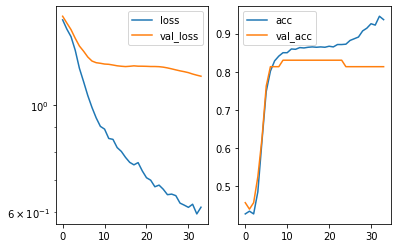

Predicted cell: Cells Probability: [[0.9179282]]
True Cell type: Cells
x [[0.5734043]]
True positional value x 0.5
y [[0.72575957]]
True positional value y 0.5


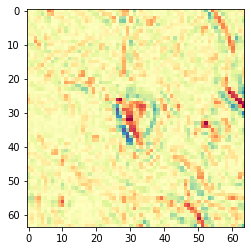

Epoch 35/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5924 - acc: 0.9474 - val_loss: 1.1420 - val_acc: 0.8136

Epoch 00035: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.142034888267517, 'val_acc': 0.8135592937469482, 'loss': 0.5924387040891146, 'acc': 0.9473684263165565, 'lr': 1e-06}


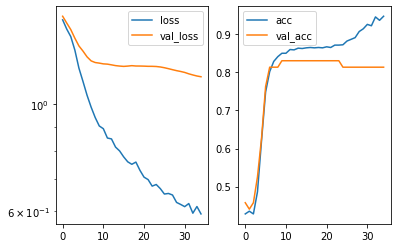

Predicted cell: Cells Probability: [[0.8032316]]
True Cell type: Normal
x [[0.3470794]]
True positional value x 0.5
y [[0.63708884]]
True positional value y 0.5


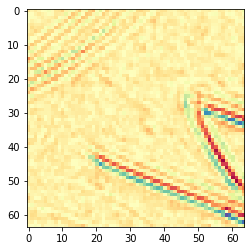

Epoch 36/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5946 - acc: 0.9599 - val_loss: 1.1382 - val_acc: 0.8136

Epoch 00036: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1381635665893555, 'val_acc': 0.8135592937469482, 'loss': 0.5945659252174404, 'acc': 0.9598572803968621, 'lr': 1e-06}


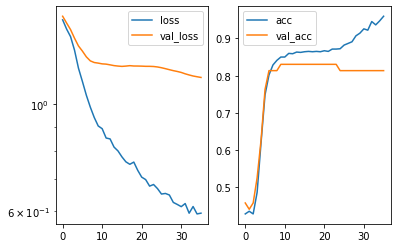

Predicted cell: Cells Probability: [[0.8963678]]
True Cell type: Cells
x [[0.80272794]]
True positional value x 0.65625
y [[0.35324395]]
True positional value y 0.34375


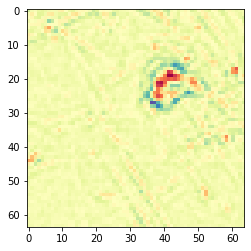

Epoch 37/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5912 - acc: 0.9616 - val_loss: 1.1344 - val_acc: 0.8136

Epoch 00037: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1343560218811035, 'val_acc': 0.8135592937469482, 'loss': 0.5912419418263499, 'acc': 0.9616414000156412, 'lr': 1e-06}


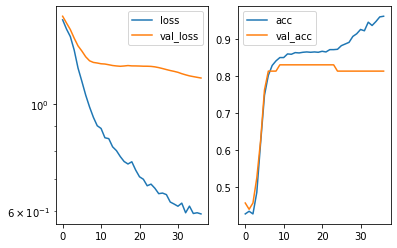

Predicted cell: Cells Probability: [[0.9004807]]
True Cell type: Cells
x [[0.4710749]]
True positional value x 0.5
y [[0.5661002]]
True positional value y 0.65625


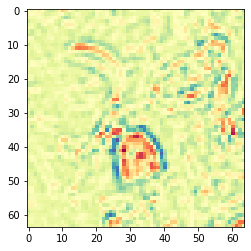

Epoch 38/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5652 - acc: 0.9661 - val_loss: 1.1313 - val_acc: 0.7966

Epoch 00038: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1312570571899414, 'val_acc': 0.7966101765632629, 'loss': 0.565237720931459, 'acc': 0.9661016937454932, 'lr': 1e-06}


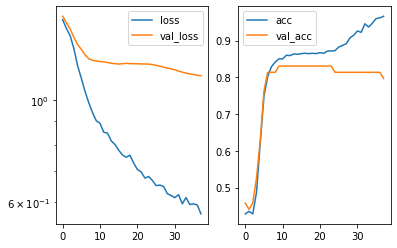

Predicted cell: Cells Probability: [[0.95007294]]
True Cell type: Cells
x [[0.52229416]]
True positional value x 0.34375
y [[0.58516556]]
True positional value y 0.65625


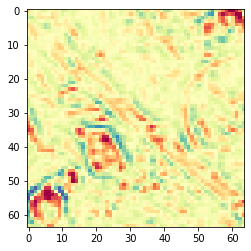

Epoch 39/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5713 - acc: 0.9670 - val_loss: 1.1289 - val_acc: 0.7966

Epoch 00039: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1289231777191162, 'val_acc': 0.7966101765632629, 'loss': 0.5712578304105311, 'acc': 0.9669937551500114, 'lr': 1e-06}


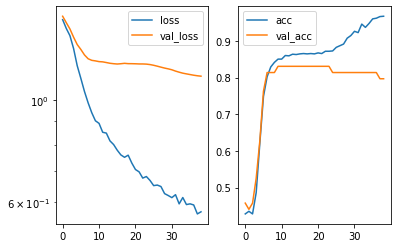

Predicted cell: Cells Probability: [[0.77146435]]
True Cell type: Normal
x [[0.35496452]]
True positional value x 0.5
y [[0.64603186]]
True positional value y 0.5


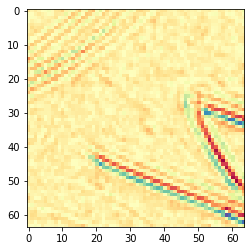

Epoch 40/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5568 - acc: 0.9795 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00040: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1279668807983398, 'val_acc': 0.7966101765632629, 'loss': 0.5568306236050152, 'acc': 0.9794826190669446, 'lr': 1e-06}


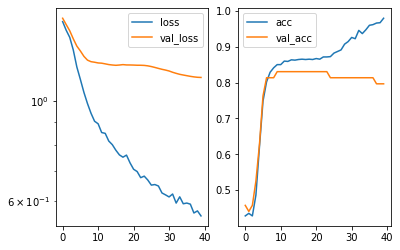

Predicted cell: Cells Probability: [[0.91095555]]
True Cell type: Cells
x [[0.818469]]
True positional value x 0.65625
y [[0.36090237]]
True positional value y 0.65625


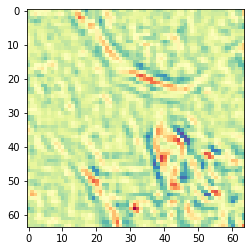

Epoch 41/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5578 - acc: 0.9822 - val_loss: 1.1267 - val_acc: 0.7966

Epoch 00041: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.126738429069519, 'val_acc': 0.7966101765632629, 'loss': 0.5577560249553207, 'acc': 0.9821587931780172, 'lr': 1e-06}


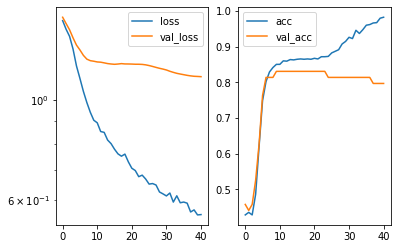

Predicted cell: Cells Probability: [[0.9505158]]
True Cell type: Cells
x [[0.6339304]]
True positional value x 0.5
y [[0.5227059]]
True positional value y 0.5


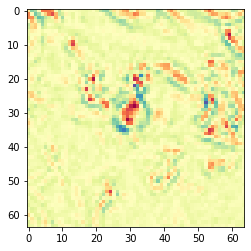

Epoch 42/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5603 - acc: 0.9768 - val_loss: 1.1255 - val_acc: 0.7966

Epoch 00042: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1255135536193848, 'val_acc': 0.7966101765632629, 'loss': 0.5602839117492553, 'acc': 0.9768064335241156, 'lr': 1e-06}


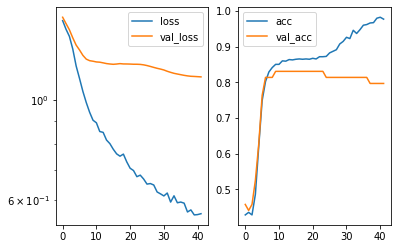

Predicted cell: Cells Probability: [[0.67585]]
True Cell type: Cells
x [[0.38509986]]
True positional value x 0.5
y [[0.43248793]]
True positional value y 0.34375


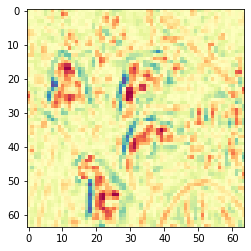

Epoch 43/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5666 - acc: 0.9697 - val_loss: 1.1244 - val_acc: 0.7966

Epoch 00043: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1243518590927124, 'val_acc': 0.7966101765632629, 'loss': 0.5665831668476884, 'acc': 0.9696699497319033, 'lr': 1e-06}


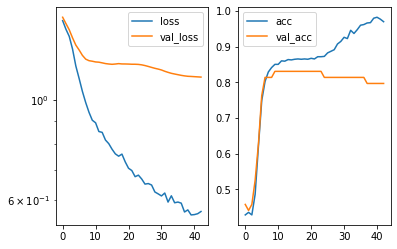

Predicted cell: Cells Probability: [[0.90034705]]
True Cell type: Cells
x [[0.6646842]]
True positional value x 0.5
y [[0.41014516]]
True positional value y 0.34375


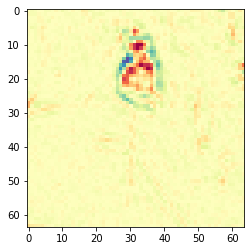

Epoch 44/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5593 - acc: 0.9768 - val_loss: 1.1227 - val_acc: 0.7966

Epoch 00044: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.

Epoch 00044: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1226694583892822, 'val_acc': 0.7966101765632629, 'loss': 0.5593447231161711, 'acc': 0.9768064303338581, 'lr': 1e-06}


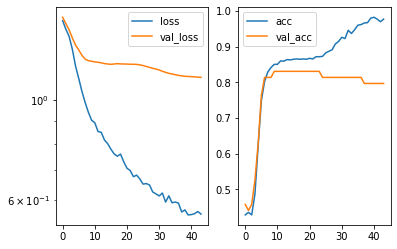

Predicted cell: Cells Probability: [[0.89524835]]
True Cell type: Normal
x [[0.41872945]]
True positional value x 0.5
y [[0.5100016]]
True positional value y 0.5


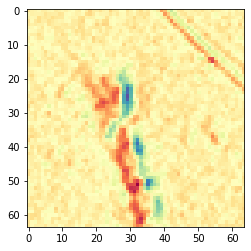

Epoch 45/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5570 - acc: 0.9822 - val_loss: 1.1241 - val_acc: 0.7966

Epoch 00045: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.124072551727295, 'val_acc': 0.7966101765632629, 'loss': 0.5570336667476862, 'acc': 0.9821587984951131, 'lr': 1e-07}


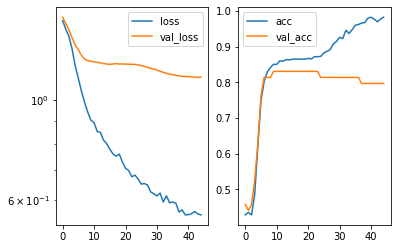

Predicted cell: Cells Probability: [[0.94894016]]
True Cell type: Cells
x [[0.6142391]]
True positional value x 0.5
y [[0.514618]]
True positional value y 0.5


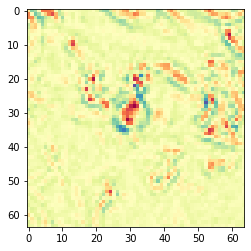

Epoch 46/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5581 - acc: 0.9795 - val_loss: 1.1253 - val_acc: 0.7966

Epoch 00046: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1253114938735962, 'val_acc': 0.7966101765632629, 'loss': 0.5581390054815056, 'acc': 0.9794826137498487, 'lr': 1e-07}


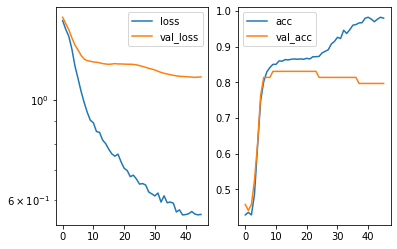

Predicted cell: Cells Probability: [[0.8394576]]
True Cell type: Normal
x [[0.2885684]]
True positional value x 0.5
y [[0.15504801]]
True positional value y 0.5


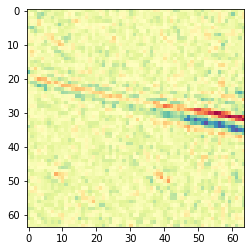

Epoch 47/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5501 - acc: 0.9857 - val_loss: 1.1249 - val_acc: 0.7966

Epoch 00047: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.124931812286377, 'val_acc': 0.7966101765632629, 'loss': 0.5501081810052857, 'acc': 0.9857270345424138, 'lr': 1e-07}


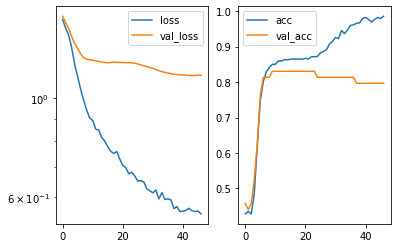

Predicted cell: Cells Probability: [[0.9853012]]
True Cell type: Cells
x [[0.51349056]]
True positional value x 0.5
y [[0.6778253]]
True positional value y 0.5


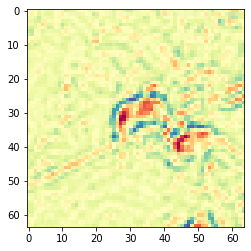

Epoch 48/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5470 - acc: 0.9893 - val_loss: 1.1249 - val_acc: 0.7966

Epoch 00048: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1249048709869385, 'val_acc': 0.7966101765632629, 'loss': 0.5469859464162168, 'acc': 0.9892952761726652, 'lr': 1e-07}


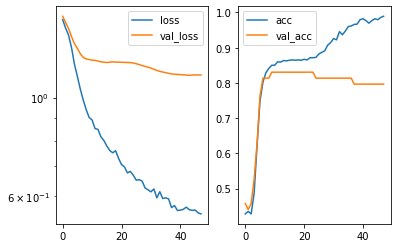

Predicted cell: Cells Probability: [[0.9004678]]
True Cell type: Normal
x [[0.4061122]]
True positional value x 0.5
y [[0.49741527]]
True positional value y 0.5


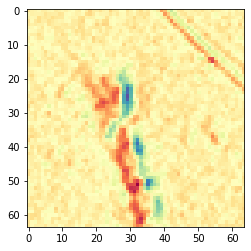

Epoch 49/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5403 - acc: 0.9920 - val_loss: 1.1251 - val_acc: 0.7966

Epoch 00049: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1250864267349243, 'val_acc': 0.7966101765632629, 'loss': 0.5402842971174766, 'acc': 0.9919714617154941, 'lr': 1e-07}


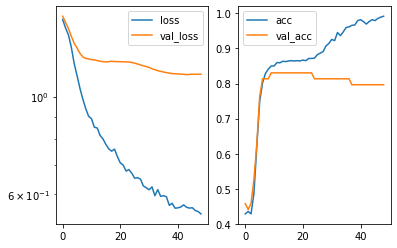

Predicted cell: Cells Probability: [[0.9050327]]
True Cell type: Cells
x [[0.5662972]]
True positional value x 0.5
y [[0.7423028]]
True positional value y 0.5


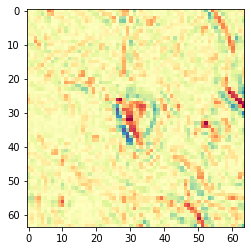

Epoch 50/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5320 - acc: 0.9902 - val_loss: 1.1245 - val_acc: 0.7966

Epoch 00050: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1245194673538208, 'val_acc': 0.7966101765632629, 'loss': 0.532010203275587, 'acc': 0.9901873367796191, 'lr': 1e-07}


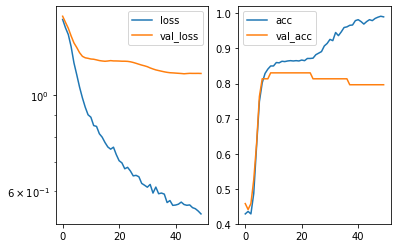

Predicted cell: Cells Probability: [[0.8988204]]
True Cell type: Cells
x [[0.4418183]]
True positional value x 0.65625
y [[0.3551091]]
True positional value y 0.5


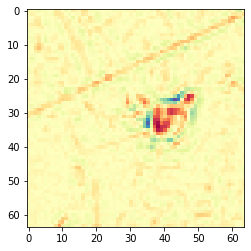

Epoch 51/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5516 - acc: 0.9813 - val_loss: 1.1234 - val_acc: 0.7966

Epoch 00051: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1233524084091187, 'val_acc': 0.7966101765632629, 'loss': 0.5515840421501385, 'acc': 0.9812667354954661, 'lr': 1e-07}


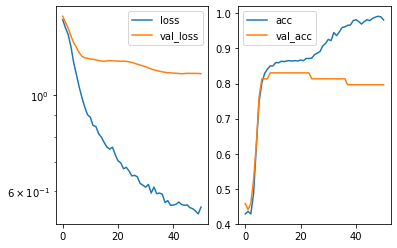

Predicted cell: Cells Probability: [[0.8532539]]
True Cell type: Normal
x [[0.29165122]]
True positional value x 0.5
y [[0.15968071]]
True positional value y 0.5


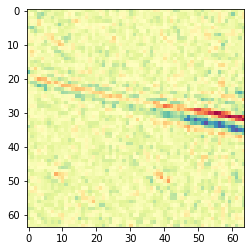

Epoch 52/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5358 - acc: 0.9920 - val_loss: 1.1229 - val_acc: 0.7966

Epoch 00052: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.122904896736145, 'val_acc': 0.7966101765632629, 'loss': 0.535787515136198, 'acc': 0.991971459322801, 'lr': 1e-07}


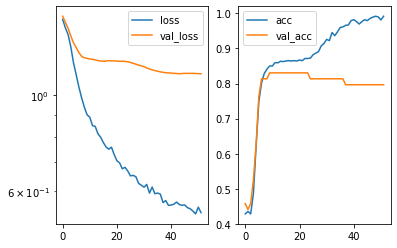

Predicted cell: Cells Probability: [[0.79261273]]
True Cell type: Normal
x [[0.36679116]]
True positional value x 0.5
y [[0.5647694]]
True positional value y 0.5


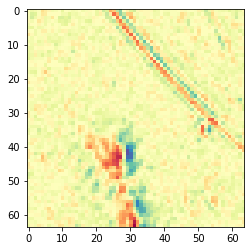

Epoch 53/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5405 - acc: 0.9884 - val_loss: 1.1212 - val_acc: 0.7966

Epoch 00053: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.121161699295044, 'val_acc': 0.7966101765632629, 'loss': 0.540501991677348, 'acc': 0.9884032184901139, 'lr': 1e-07}


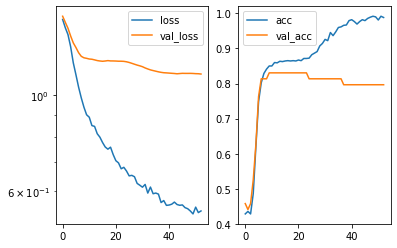

Predicted cell: Cells Probability: [[0.8743085]]
True Cell type: Cells
x [[0.5997365]]
True positional value x 0.65625
y [[0.6456194]]
True positional value y 0.5


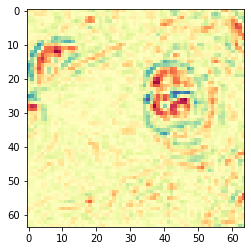

Epoch 54/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5251 - acc: 0.9955 - val_loss: 1.1202 - val_acc: 0.7966

Epoch 00054: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.120164155960083, 'val_acc': 0.7966101765632629, 'loss': 0.5251470832926796, 'acc': 0.9955396993579235, 'lr': 1e-07}


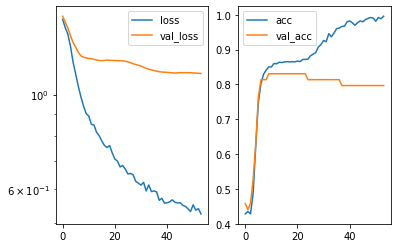

Predicted cell: Cells Probability: [[0.6584564]]
True Cell type: Cells
x [[0.40344518]]
True positional value x 0.5
y [[0.47525585]]
True positional value y 0.34375


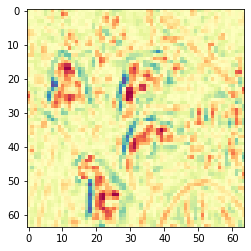

Epoch 55/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5356 - acc: 0.9866 - val_loss: 1.1205 - val_acc: 0.7966

Epoch 00055: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1205427646636963, 'val_acc': 0.7966101765632629, 'loss': 0.535559932585809, 'acc': 0.9866190967444965, 'lr': 1e-07}


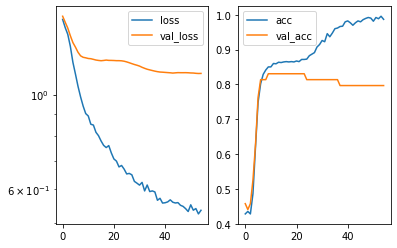

Predicted cell: Cells Probability: [[0.94157696]]
True Cell type: Cells
x [[0.5364226]]
True positional value x 0.34375
y [[0.95222414]]
True positional value y 0.5


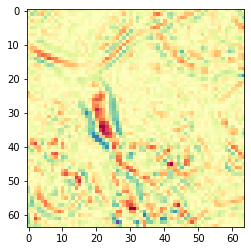

Epoch 56/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5312 - acc: 0.9920 - val_loss: 1.1211 - val_acc: 0.7966

Epoch 00056: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1211085319519043, 'val_acc': 0.7966101765632629, 'loss': 0.5312038490965789, 'acc': 0.9919714617154941, 'lr': 1e-07}


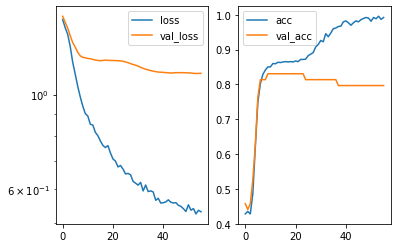

Predicted cell: Cells Probability: [[0.9143729]]
True Cell type: Cells
x [[0.7010993]]
True positional value x 0.65625
y [[0.32633233]]
True positional value y 0.65625


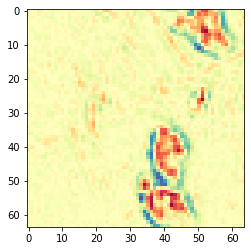

Epoch 57/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5370 - acc: 0.9911 - val_loss: 1.1219 - val_acc: 0.7966

Epoch 00057: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1219067573547363, 'val_acc': 0.7966101765632629, 'loss': 0.5369540325878562, 'acc': 0.9910793965890087, 'lr': 1e-07}


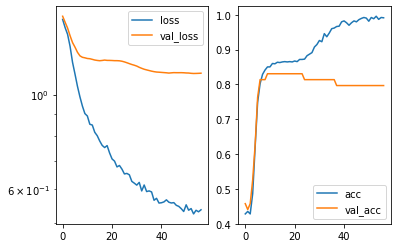

Predicted cell: Cells Probability: [[0.9747214]]
True Cell type: Cells
x [[0.453904]]
True positional value x 0.65625
y [[0.32307228]]
True positional value y 0.5


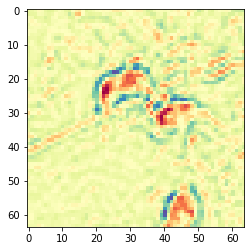

Epoch 58/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5271 - acc: 0.9946 - val_loss: 1.1223 - val_acc: 0.7966

Epoch 00058: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.

Epoch 00058: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1222972869873047, 'val_acc': 0.7966101765632629, 'loss': 0.5270703806609155, 'acc': 0.9946476411436627, 'lr': 1e-07}


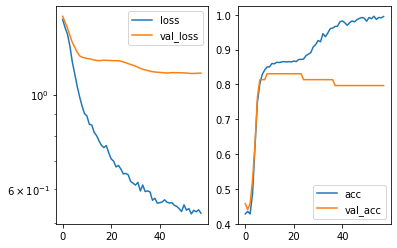

Predicted cell: Cells Probability: [[0.95844215]]
True Cell type: Cells
x [[0.6243842]]
True positional value x 0.5
y [[0.497209]]
True positional value y 0.5


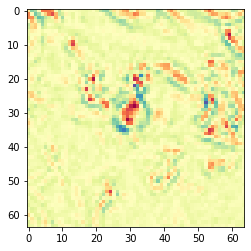

Epoch 59/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5353 - acc: 0.9929 - val_loss: 1.1234 - val_acc: 0.7966

Epoch 00059: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.123371958732605, 'val_acc': 0.7966101765632629, 'loss': 0.5353014526039654, 'acc': 0.9928635207273192, 'lr': 1e-08}


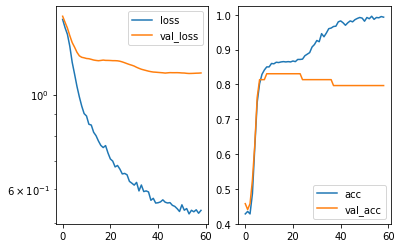

Predicted cell: Cells Probability: [[0.66476655]]
True Cell type: Normal
x [[0.4005607]]
True positional value x 0.5
y [[0.38513526]]
True positional value y 0.5


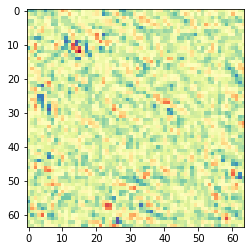

Epoch 60/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5268 - acc: 0.9964 - val_loss: 1.1236 - val_acc: 0.7966

Epoch 00060: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.123621940612793, 'val_acc': 0.7966101765632629, 'loss': 0.5267654880150209, 'acc': 0.9964317607624418, 'lr': 1e-08}


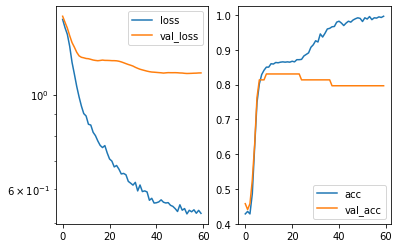

Predicted cell: Cells Probability: [[0.79529303]]
True Cell type: Cells
x [[0.58490753]]
True positional value x 0.65625
y [[0.8297999]]
True positional value y 0.5


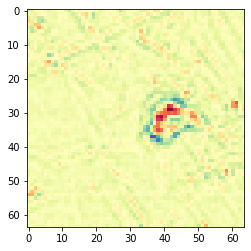

Epoch 61/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5360 - acc: 0.9866 - val_loss: 1.1241 - val_acc: 0.7966

Epoch 00061: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1241499185562134, 'val_acc': 0.7966101765632629, 'loss': 0.536014196704691, 'acc': 0.9866190975420609, 'lr': 1e-08}


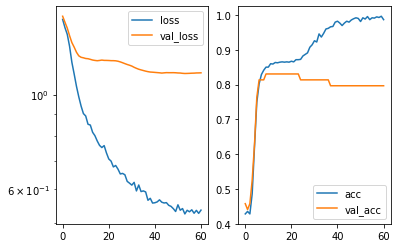

Predicted cell: Cells Probability: [[0.80266553]]
True Cell type: Normal
x [[0.38557634]]
True positional value x 0.5
y [[0.5517138]]
True positional value y 0.5


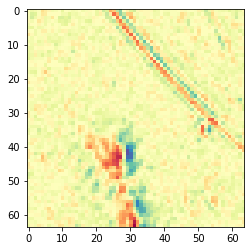

Epoch 62/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5522 - acc: 0.9857 - val_loss: 1.1248 - val_acc: 0.7966

Epoch 00062: ReduceLROnPlateau reducing learning rate to 9.999999939225292e-10.

Epoch 00062: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1247577667236328, 'val_acc': 0.7966101765632629, 'loss': 0.5522366254378599, 'acc': 0.9857270316180111, 'lr': 1e-08}


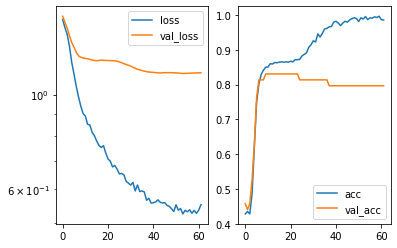

Predicted cell: Cells Probability: [[0.9879788]]
True Cell type: Cells
x [[0.5345338]]
True positional value x 0.5
y [[0.6854561]]
True positional value y 0.5


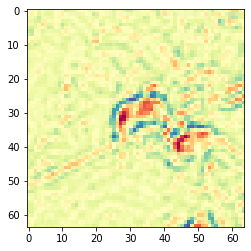

Epoch 63/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5360 - acc: 0.9920 - val_loss: 1.1256 - val_acc: 0.7966

Epoch 00063: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1255615949630737, 'val_acc': 0.7966101765632629, 'loss': 0.5360499497612707, 'acc': 0.9919714617154941, 'lr': 1e-09}


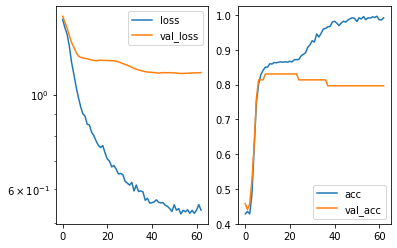

Predicted cell: Cells Probability: [[0.8643488]]
True Cell type: Cells
x [[0.82339406]]
True positional value x 0.65625
y [[0.3527732]]
True positional value y 0.65625


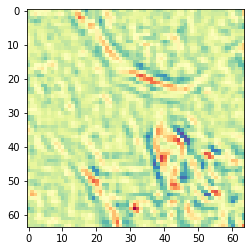

Epoch 64/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5341 - acc: 0.9884 - val_loss: 1.1260 - val_acc: 0.7966

Epoch 00064: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.125950813293457, 'val_acc': 0.7966101765632629, 'loss': 0.5340564118550357, 'acc': 0.9884032139705825, 'lr': 1e-09}


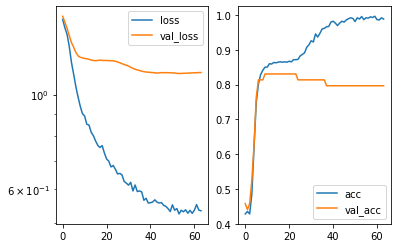

Predicted cell: Cells Probability: [[0.6721717]]
True Cell type: Cells
x [[0.4079696]]
True positional value x 0.5
y [[0.49345994]]
True positional value y 0.34375


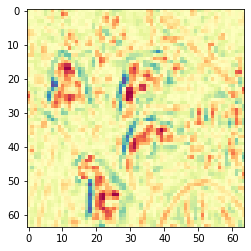

Epoch 65/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5416 - acc: 0.9893 - val_loss: 1.1262 - val_acc: 0.7966

Epoch 00065: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1262339353561401, 'val_acc': 0.7966101765632629, 'loss': 0.541553305420463, 'acc': 0.9892952745775364, 'lr': 1e-09}


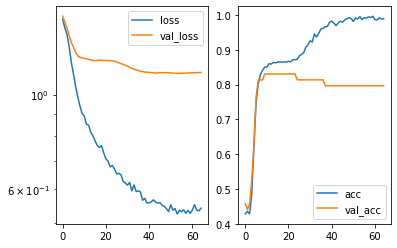

Predicted cell: Cells Probability: [[0.6727529]]
True Cell type: Cells
x [[0.40315518]]
True positional value x 0.5
y [[0.49020767]]
True positional value y 0.34375


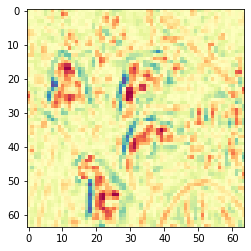

Epoch 66/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5231 - acc: 0.9929 - val_loss: 1.1267 - val_acc: 0.7966

Epoch 00066: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1267067193984985, 'val_acc': 0.7966101765632629, 'loss': 0.5231488555483687, 'acc': 0.9928635199297549, 'lr': 1e-09}


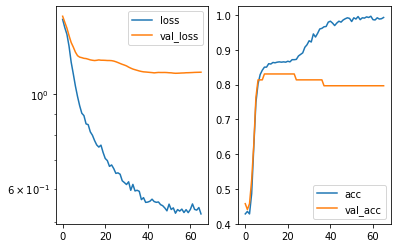

Predicted cell: Cells Probability: [[0.89190525]]
True Cell type: Cells
x [[0.50012726]]
True positional value x 0.65625
y [[0.5215753]]
True positional value y 0.34375


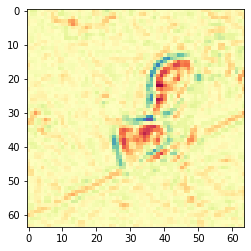

Epoch 67/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5283 - acc: 0.9964 - val_loss: 1.1269 - val_acc: 0.7966

Epoch 00067: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1269490718841553, 'val_acc': 0.7966101765632629, 'loss': 0.5283381837909504, 'acc': 0.9964317583697486, 'lr': 1e-09}


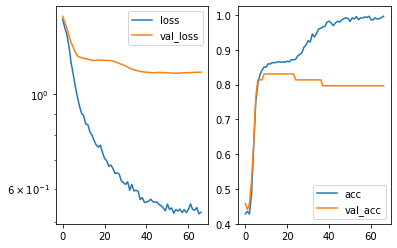

Predicted cell: Cells Probability: [[0.88412666]]
True Cell type: Cells
x [[0.60247046]]
True positional value x 0.65625
y [[0.63918227]]
True positional value y 0.5


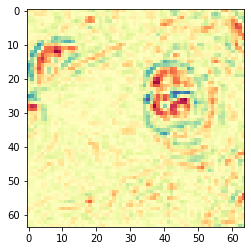

Epoch 68/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5301 - acc: 0.9911 - val_loss: 1.1271 - val_acc: 0.7966

Epoch 00068: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.127126932144165, 'val_acc': 0.7966101765632629, 'loss': 0.5301259137710006, 'acc': 0.9910793912719128, 'lr': 1e-09}


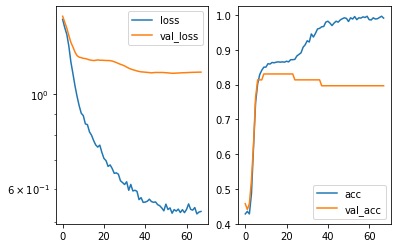

Predicted cell: Cells Probability: [[0.8036335]]
True Cell type: Cells
x [[0.5824435]]
True positional value x 0.65625
y [[0.8279747]]
True positional value y 0.5


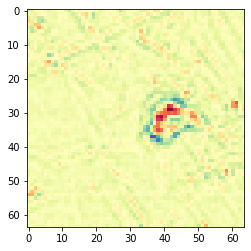

Epoch 69/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5398 - acc: 0.9902 - val_loss: 1.1273 - val_acc: 0.7966

Epoch 00069: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1273225545883179, 'val_acc': 0.7966101765632629, 'loss': 0.539823305436695, 'acc': 0.9901873359820547, 'lr': 1e-09}


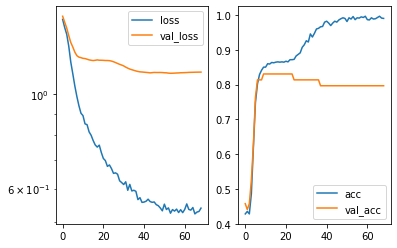

Predicted cell: Cells Probability: [[0.8760974]]
True Cell type: Cells
x [[0.77855605]]
True positional value x 0.5
y [[0.62797743]]
True positional value y 0.65625


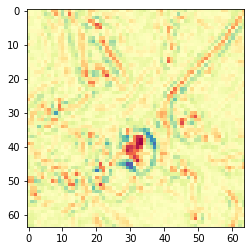

Epoch 70/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5285 - acc: 0.9929 - val_loss: 1.1277 - val_acc: 0.7966

Epoch 00070: ReduceLROnPlateau reducing learning rate to 9.999999717180686e-11.

Epoch 00070: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1276848316192627, 'val_acc': 0.7966101765632629, 'loss': 0.5284766518144497, 'acc': 0.9928635215248837, 'lr': 1e-09}


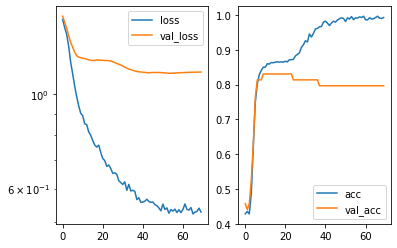

Predicted cell: Cells Probability: [[0.92822397]]
True Cell type: Cells
x [[0.33132637]]
True positional value x 0.5
y [[0.6167236]]
True positional value y 0.65625


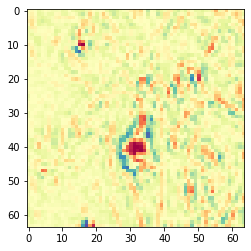

Epoch 71/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5278 - acc: 0.9964 - val_loss: 1.1276 - val_acc: 0.7966

Epoch 00071: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.127594232559204, 'val_acc': 0.7966101765632629, 'loss': 0.527801841098639, 'acc': 0.9964317607624418, 'lr': 9.9999994e-11}


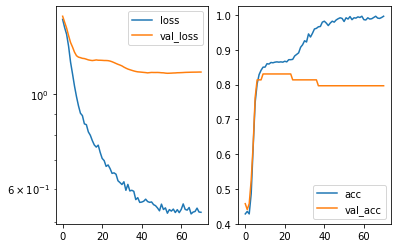

Predicted cell: Cells Probability: [[0.9160552]]
True Cell type: Normal
x [[0.42259783]]
True positional value x 0.5
y [[0.52476263]]
True positional value y 0.5


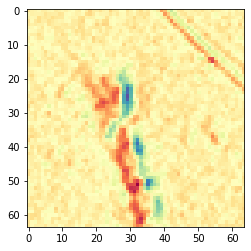

Epoch 72/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5219 - acc: 0.9938 - val_loss: 1.1281 - val_acc: 0.7966

Epoch 00072: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1281203031539917, 'val_acc': 0.7966101765632629, 'loss': 0.5219310798036744, 'acc': 0.9937555805367088, 'lr': 9.9999994e-11}


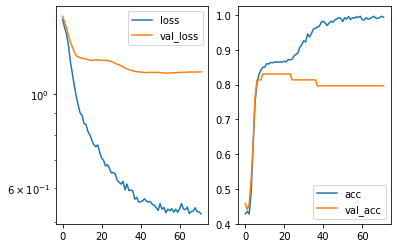

Predicted cell: Cells Probability: [[0.90305364]]
True Cell type: Cells
x [[0.17579727]]
True positional value x 0.34375
y [[0.5829518]]
True positional value y 0.5


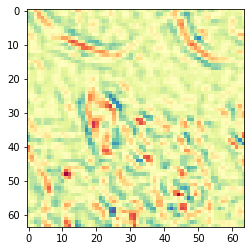

Epoch 73/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5376 - acc: 0.9920 - val_loss: 1.1283 - val_acc: 0.7966

Epoch 00073: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1283107995986938, 'val_acc': 0.7966101765632629, 'loss': 0.5375940133481022, 'acc': 0.9919714548032694, 'lr': 9.9999994e-11}


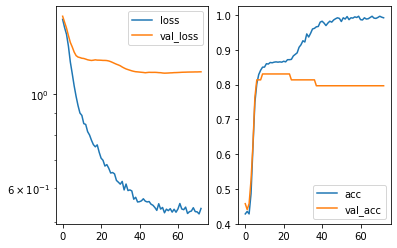

Predicted cell: Cells Probability: [[0.76150197]]
True Cell type: Cells
x [[0.48432413]]
True positional value x 0.65625
y [[0.554628]]
True positional value y 0.34375


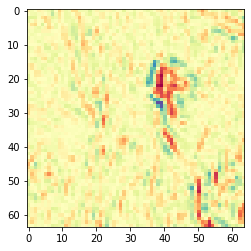

Epoch 74/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5223 - acc: 0.9964 - val_loss: 1.1284 - val_acc: 0.7966

Epoch 00074: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128351092338562, 'val_acc': 0.7966101765632629, 'loss': 0.5222822801541473, 'acc': 0.9964317607624418, 'lr': 9.9999994e-11}


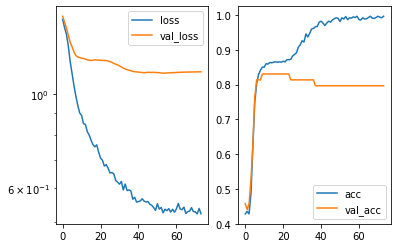

Predicted cell: Cells Probability: [[0.9194177]]
True Cell type: Cells
x [[0.5728793]]
True positional value x 0.5
y [[0.7524785]]
True positional value y 0.5


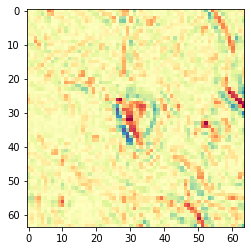

Epoch 75/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5330 - acc: 0.9875 - val_loss: 1.1283 - val_acc: 0.7966

Epoch 00075: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1282624006271362, 'val_acc': 0.7966101765632629, 'loss': 0.5330341679511806, 'acc': 0.9875111549587573, 'lr': 9.9999994e-11}


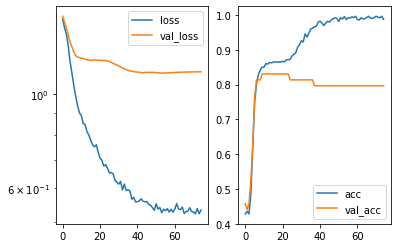

Predicted cell: Cells Probability: [[0.91947997]]
True Cell type: Cells
x [[0.5743742]]
True positional value x 0.5
y [[0.7516359]]
True positional value y 0.5


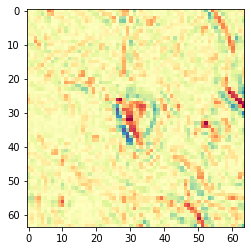

Epoch 76/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5286 - acc: 0.9938 - val_loss: 1.1282 - val_acc: 0.7966

Epoch 00076: ReduceLROnPlateau reducing learning rate to 9.99999943962493e-12.

Epoch 00076: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128199815750122, 'val_acc': 0.7966101765632629, 'loss': 0.5285749292926635, 'acc': 0.9937555813342731, 'lr': 9.9999994e-11}


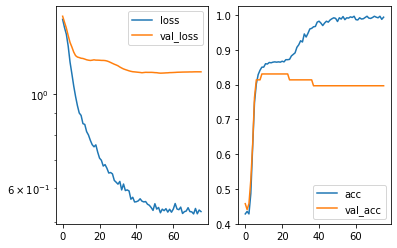

Predicted cell: Cells Probability: [[0.88145334]]
True Cell type: Cells
x [[0.39936638]]
True positional value x 0.34375
y [[0.6632655]]
True positional value y 0.65625


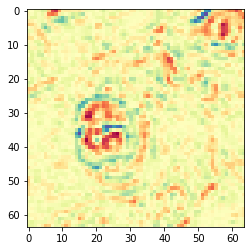

Epoch 77/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5309 - acc: 0.9938 - val_loss: 1.1279 - val_acc: 0.7966

Epoch 00077: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1278719902038574, 'val_acc': 0.7966101765632629, 'loss': 0.5309252587947114, 'acc': 0.9937555813342731, 'lr': 9.999999e-12}


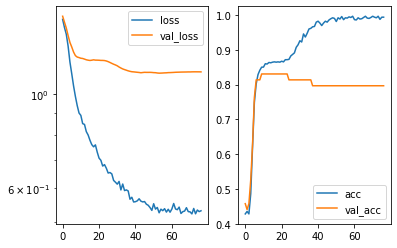

Predicted cell: Cells Probability: [[0.8650127]]
True Cell type: Cells
x [[0.25085747]]
True positional value x 0.34375
y [[0.6585189]]
True positional value y 0.34375


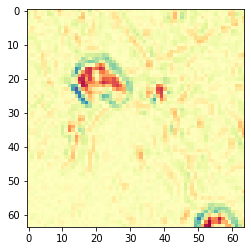

Epoch 78/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5294 - acc: 0.9973 - val_loss: 1.1279 - val_acc: 0.7966

Epoch 00078: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1278542280197144, 'val_acc': 0.7966101765632629, 'loss': 0.5294457616601854, 'acc': 0.9973238205718313, 'lr': 9.999999e-12}


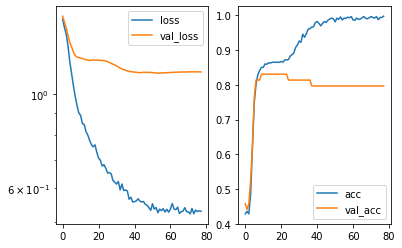

Predicted cell: Cells Probability: [[0.7898348]]
True Cell type: Normal
x [[0.30822176]]
True positional value x 0.5
y [[0.6006867]]
True positional value y 0.5


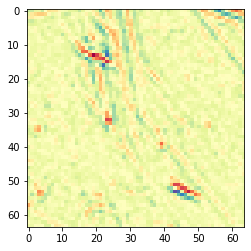

Epoch 79/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5343 - acc: 0.9902 - val_loss: 1.1277 - val_acc: 0.7966

Epoch 00079: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1276623010635376, 'val_acc': 0.7966101765632629, 'loss': 0.5342899307302872, 'acc': 0.9901873359820547, 'lr': 9.999999e-12}


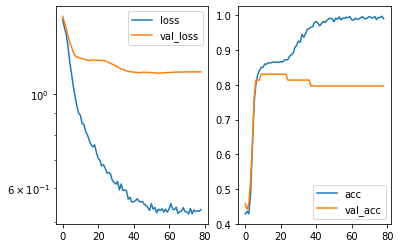

Predicted cell: Cells Probability: [[0.8787974]]
True Cell type: Cells
x [[0.7790336]]
True positional value x 0.5
y [[0.6214406]]
True positional value y 0.65625


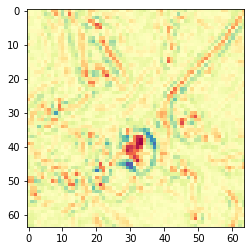

Epoch 80/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5235 - acc: 0.9938 - val_loss: 1.1277 - val_acc: 0.7966

Epoch 00080: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 00080: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1276683807373047, 'val_acc': 0.7966101765632629, 'loss': 0.5234724259291452, 'acc': 0.9937555805367088, 'lr': 9.999999e-12}


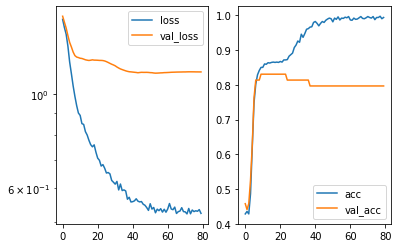

Predicted cell: Cells Probability: [[0.9532767]]
True Cell type: Cells
x [[0.5524111]]
True positional value x 0.34375
y [[0.5764607]]
True positional value y 0.65625


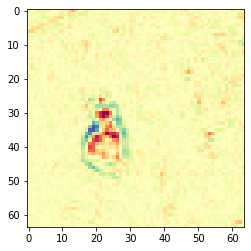

Epoch 81/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5308 - acc: 0.9866 - val_loss: 1.1277 - val_acc: 0.7966

Epoch 00081: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1277391910552979, 'val_acc': 0.7966101765632629, 'loss': 0.5308410404623884, 'acc': 0.9866190975420609, 'lr': 9.999999e-13}


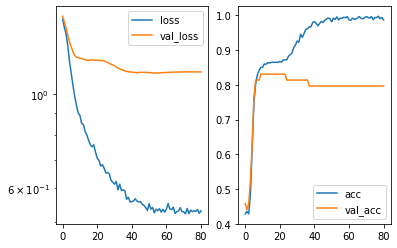

Predicted cell: Cells Probability: [[0.90689576]]
True Cell type: Cells
x [[0.38558087]]
True positional value x 0.65625
y [[0.3831019]]
True positional value y 0.65625


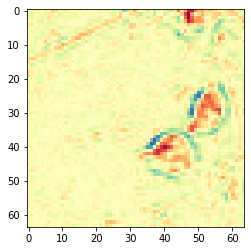

Epoch 82/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5383 - acc: 0.9920 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00082: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1279853582382202, 'val_acc': 0.7966101765632629, 'loss': 0.5383222828902484, 'acc': 0.9919714617154941, 'lr': 9.999999e-13}


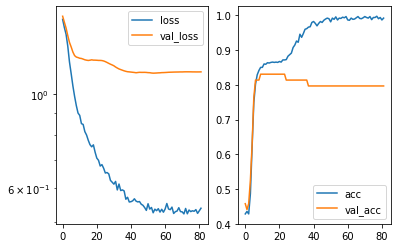

Predicted cell: Cells Probability: [[0.915087]]
True Cell type: Cells
x [[0.47395676]]
True positional value x 0.5
y [[0.6072133]]
True positional value y 0.65625


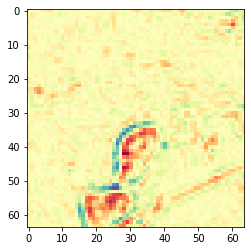

Epoch 83/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5233 - acc: 0.9955 - val_loss: 1.1277 - val_acc: 0.7966

Epoch 00083: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1277439594268799, 'val_acc': 0.7966101765632629, 'loss': 0.5232959838449477, 'acc': 0.9955397001554879, 'lr': 9.999999e-13}


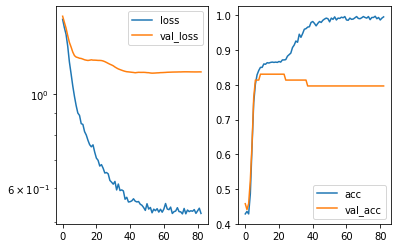

Predicted cell: Cells Probability: [[0.9462045]]
True Cell type: Cells
x [[0.50952476]]
True positional value x 0.34375
y [[0.95262897]]
True positional value y 0.5


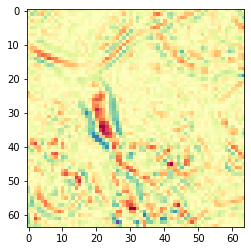

Epoch 84/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5270 - acc: 0.9920 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00084: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 00084: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128045916557312, 'val_acc': 0.7966101765632629, 'loss': 0.5269800798899356, 'acc': 0.9919714548032694, 'lr': 9.999999e-13}


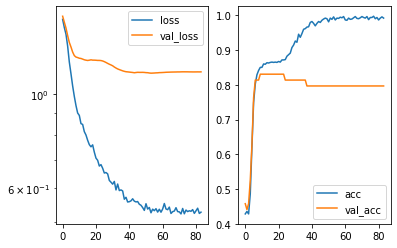

Predicted cell: Cells Probability: [[0.9642648]]
True Cell type: Cells
x [[0.6244226]]
True positional value x 0.5
y [[0.4925733]]
True positional value y 0.5


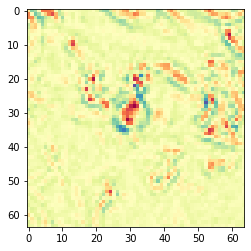

Epoch 85/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5388 - acc: 0.9920 - val_loss: 1.1282 - val_acc: 0.7966

Epoch 00085: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128193736076355, 'val_acc': 0.7966101765632629, 'loss': 0.5388421937889759, 'acc': 0.9919714609179296, 'lr': 9.999999e-14}


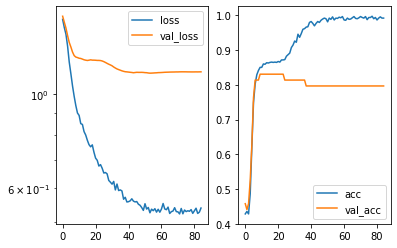

Predicted cell: Cells Probability: [[0.8492191]]
True Cell type: Cells
x [[0.2730846]]
True positional value x 0.5
y [[0.4295708]]
True positional value y 0.34375


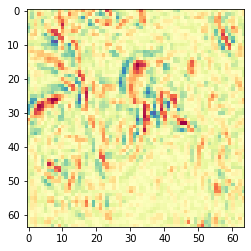

Epoch 86/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5261 - acc: 0.9938 - val_loss: 1.1284 - val_acc: 0.7966

Epoch 00086: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1284393072128296, 'val_acc': 0.7966101765632629, 'loss': 0.5261418135648961, 'acc': 0.9937555813342731, 'lr': 9.999999e-14}


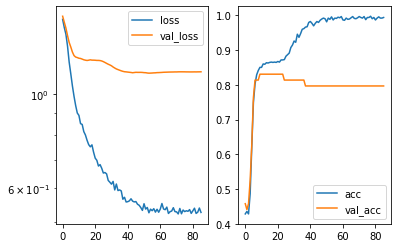

Predicted cell: Cells Probability: [[0.93251866]]
True Cell type: Cells
x [[0.80841416]]
True positional value x 0.65625
y [[0.3783547]]
True positional value y 0.34375


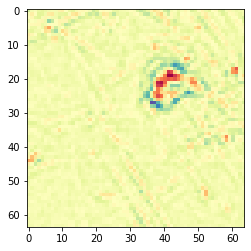

Epoch 87/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5292 - acc: 0.9920 - val_loss: 1.1281 - val_acc: 0.7966

Epoch 00087: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1281408071517944, 'val_acc': 0.7966101765632629, 'loss': 0.5292271835584921, 'acc': 0.9919714577276721, 'lr': 9.999999e-14}


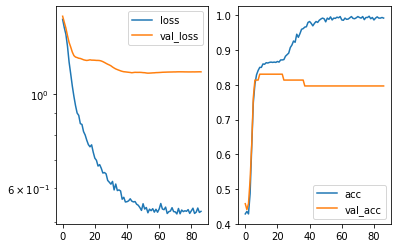

Predicted cell: Cells Probability: [[0.8717076]]
True Cell type: Cells
x [[0.8212888]]
True positional value x 0.65625
y [[0.3489742]]
True positional value y 0.65625


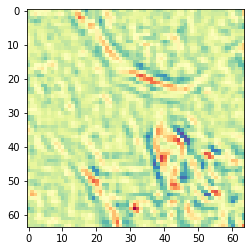

Epoch 88/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5323 - acc: 0.9929 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00088: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 00088: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1280221939086914, 'val_acc': 0.7966101765632629, 'loss': 0.5323232712754173, 'acc': 0.9928635162077878, 'lr': 9.999999e-14}


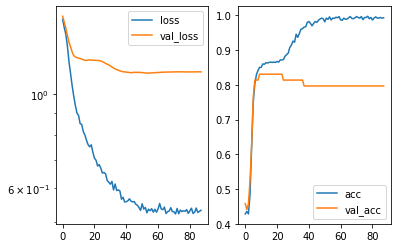

Predicted cell: Cells Probability: [[0.6775091]]
True Cell type: Cells
x [[0.3940332]]
True positional value x 0.5
y [[0.48678172]]
True positional value y 0.34375


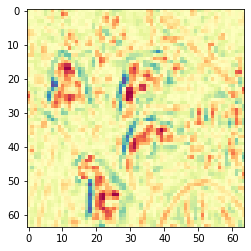

Epoch 89/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5335 - acc: 0.9920 - val_loss: 1.1284 - val_acc: 0.7966

Epoch 00089: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1284173727035522, 'val_acc': 0.7966101765632629, 'loss': 0.5334534983779574, 'acc': 0.9919714601203653, 'lr': 9.999999e-15}


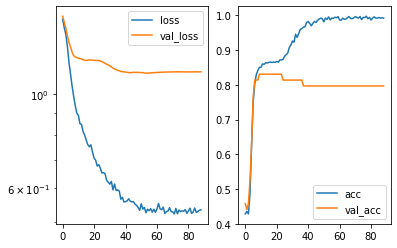

Predicted cell: Cells Probability: [[0.85902697]]
True Cell type: Cells
x [[0.48387343]]
True positional value x 0.5
y [[0.57273334]]
True positional value y 0.5


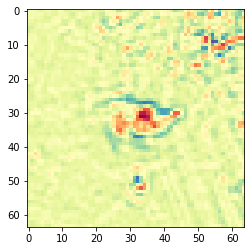

Epoch 90/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5245 - acc: 0.9973 - val_loss: 1.1281 - val_acc: 0.7966

Epoch 00090: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128098726272583, 'val_acc': 0.7966101765632629, 'loss': 0.5244641541158589, 'acc': 0.997323819774267, 'lr': 9.999999e-15}


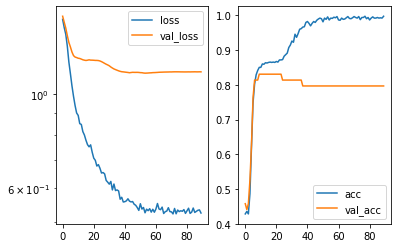

Predicted cell: Cells Probability: [[0.9815159]]
True Cell type: Cells
x [[0.25422746]]
True positional value x 0.34375
y [[0.68138003]]
True positional value y 0.5


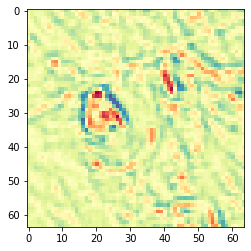

Epoch 91/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5248 - acc: 0.9964 - val_loss: 1.1282 - val_acc: 0.7966

Epoch 00091: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1282048225402832, 'val_acc': 0.7966101765632629, 'loss': 0.5248242985659897, 'acc': 0.9964317607624418, 'lr': 9.999999e-15}


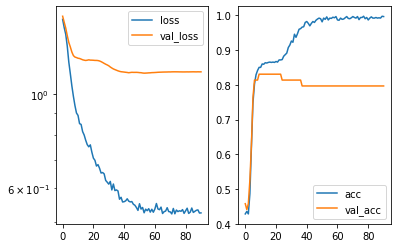

Predicted cell: Cells Probability: [[0.9593059]]
True Cell type: Cells
x [[0.48243195]]
True positional value x 0.34375
y [[0.6355763]]
True positional value y 0.5


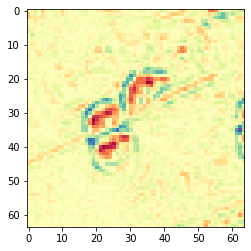

Epoch 92/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5308 - acc: 0.9929 - val_loss: 1.1283 - val_acc: 0.7966

Epoch 00092: ReduceLROnPlateau reducing learning rate to 9.999998977483753e-16.

Epoch 00092: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1283388137817383, 'val_acc': 0.7966101765632629, 'loss': 0.5308096765621128, 'acc': 0.9928635215248837, 'lr': 9.999999e-15}


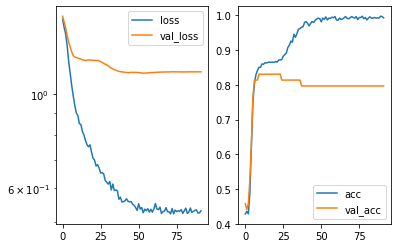

Predicted cell: Cells Probability: [[0.9592782]]
True Cell type: Cells
x [[0.48279336]]
True positional value x 0.34375
y [[0.63502973]]
True positional value y 0.5


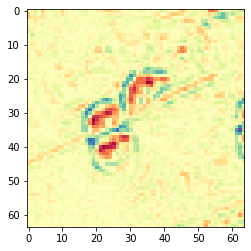

Epoch 93/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5223 - acc: 0.9946 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00093: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1280165910720825, 'val_acc': 0.7966101765632629, 'loss': 0.5223183781839076, 'acc': 0.9946476403460983, 'lr': 9.999999e-16}


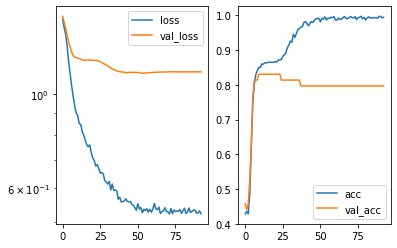

Predicted cell: Cells Probability: [[0.9047767]]
True Cell type: Cells
x [[0.17621031]]
True positional value x 0.34375
y [[0.58851886]]
True positional value y 0.5


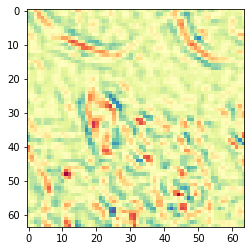

Epoch 94/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5210 - acc: 0.9964 - val_loss: 1.1284 - val_acc: 0.7966

Epoch 00094: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1284199953079224, 'val_acc': 0.7966101765632629, 'loss': 0.521024144567835, 'acc': 0.9964317607624418, 'lr': 9.999999e-16}


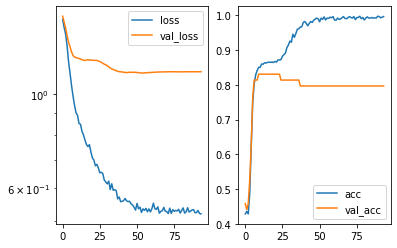

Predicted cell: Cells Probability: [[0.8435611]]
True Cell type: Cells
x [[0.5186232]]
True positional value x 0.65625
y [[0.4360306]]
True positional value y 0.5


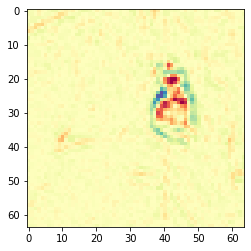

Epoch 95/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5357 - acc: 0.9902 - val_loss: 1.1278 - val_acc: 0.7966

Epoch 00095: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1278417110443115, 'val_acc': 0.7966101765632629, 'loss': 0.5356887350860821, 'acc': 0.9901873314625232, 'lr': 9.999999e-16}


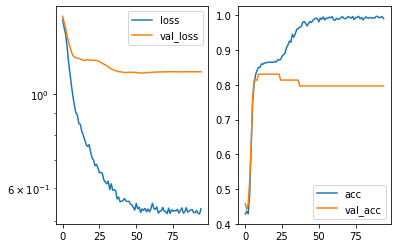

Predicted cell: Cells Probability: [[0.8436018]]
True Cell type: Cells
x [[0.6682864]]
True positional value x 0.65625
y [[0.5789906]]
True positional value y 0.5


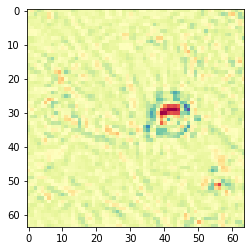

Epoch 96/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5426 - acc: 0.9884 - val_loss: 1.1282 - val_acc: 0.7966

Epoch 00096: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1282306909561157, 'val_acc': 0.7966101765632629, 'loss': 0.5426378602113817, 'acc': 0.98840321716084, 'lr': 9.999999e-16}


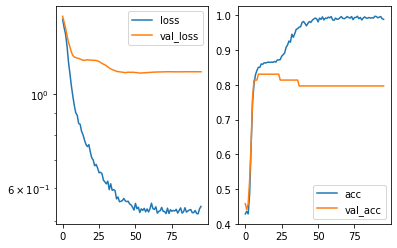

Predicted cell: Cells Probability: [[0.9772652]]
True Cell type: Cells
x [[0.4408012]]
True positional value x 0.65625
y [[0.32678482]]
True positional value y 0.5


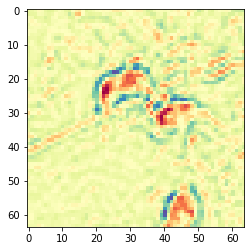

Epoch 97/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5249 - acc: 0.9955 - val_loss: 1.1283 - val_acc: 0.7966

Epoch 00097: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1283040046691895, 'val_acc': 0.7966101765632629, 'loss': 0.5248744703370689, 'acc': 0.9955397009530522, 'lr': 9.999999e-16}


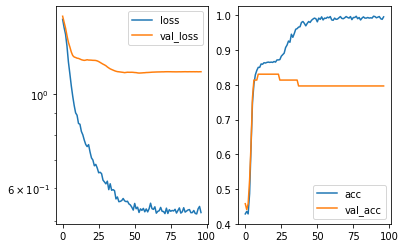

Predicted cell: Cells Probability: [[0.8680924]]
True Cell type: Cells
x [[0.46188626]]
True positional value x 0.34375
y [[0.46282542]]
True positional value y 0.34375


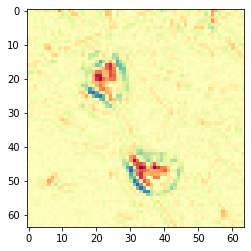

Epoch 98/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5278 - acc: 0.9929 - val_loss: 1.1284 - val_acc: 0.7966

Epoch 00098: ReduceLROnPlateau reducing learning rate to 9.999998977483754e-17.

Epoch 00098: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.128440260887146, 'val_acc': 0.7966101765632629, 'loss': 0.5278391818400475, 'acc': 0.9928635154102233, 'lr': 9.999999e-16}


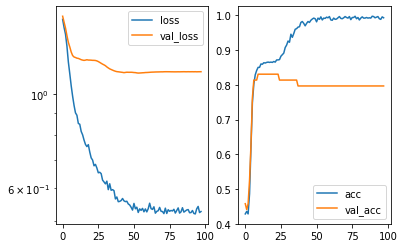

Predicted cell: Cells Probability: [[0.9329737]]
True Cell type: Cells
x [[0.8092276]]
True positional value x 0.65625
y [[0.3789872]]
True positional value y 0.34375


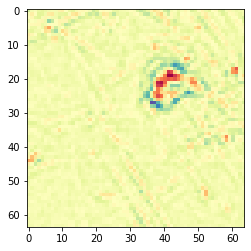

Epoch 99/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5398 - acc: 0.9875 - val_loss: 1.1280 - val_acc: 0.7966

Epoch 00099: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1280025243759155, 'val_acc': 0.7966101765632629, 'loss': 0.5398372494674601, 'acc': 0.9875111573514505, 'lr': 9.999999e-17}


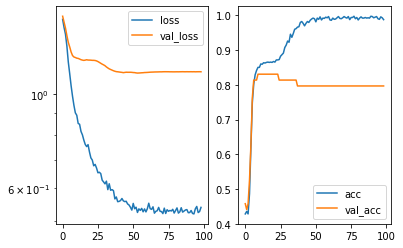

Predicted cell: Cells Probability: [[0.8431834]]
True Cell type: Cells
x [[0.671305]]
True positional value x 0.65625
y [[0.5789288]]
True positional value y 0.5


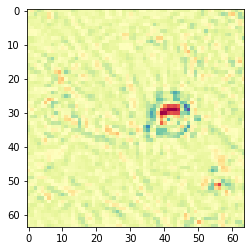

Epoch 100/250
1121/1121 [==============================] - 3s 3ms/step - loss: 0.5266 - acc: 0.9920 - val_loss: 1.1269 - val_acc: 0.7966

Epoch 00100: saving model to /home/sancere/Kepler/Incucyte/model/incucyteseqnetd47.h5
{'val_loss': 1.1269049644470215, 'val_acc': 0.7966101765632629, 'loss': 0.5266144109771892, 'acc': 0.9919714548032694, 'lr': 9.999999e-17}


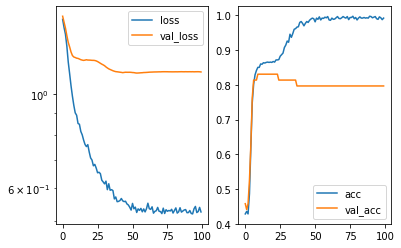

Predicted cell: Cells Probability: [[0.87940675]]
True Cell type: Normal
x [[0.30681783]]
True positional value x 0.5
y [[0.17304993]]
True positional value y 0.5


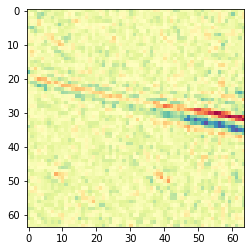

Epoch 101/250
 200/1121 [====>.........................] - ETA: 2s - loss: 0.5061 - acc: 1.0000

KeyboardInterrupt: 

In [9]:
static_model = NEATStatic(config, model_dir, model_name)

static_model.loadData()

static_model.TrainModel()
